# Housing Prices: Model Selection

## 1. Preprocessing Pipeline

In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config

In [192]:
# reading
original_housing_df = pd.read_csv('housing_iteration_4_classification.csv')
data = original_housing_df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
 10  MSZoning      1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Heating       1460 non-null   object 
 13  Street        1460 non-null   object 
 14  CentralAir    1460 non-null   object 
 15  Foundation    1460 non-null   object 
 16  ExterQual     1460 non-null   object 
 17  ExterCond     1460 non-null   object 
 18  BsmtQual      1423 non-null 

In [193]:
# X and y creation
X = data.copy()#drop(columns=["FireplaceQu"])
y = X.pop("Expensive")

In [194]:
# Feature Engineering
# No feature Engineering is needed
#X.loc[:, "Cabin"] = X.Cabin.str[0]

In [195]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

<Axes: >

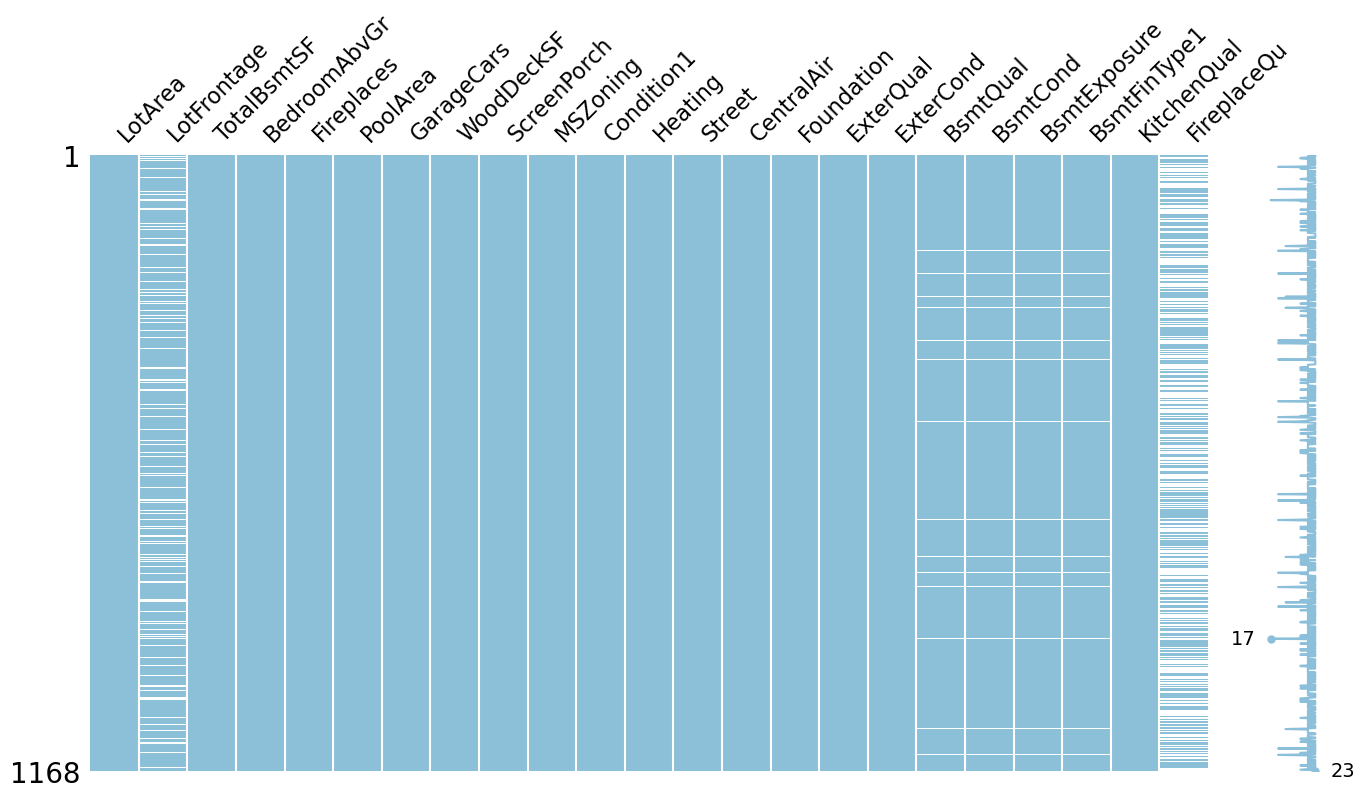

In [196]:
#!pip install missingno
import missingno as msno
msno.matrix(X_train, color=(0.55, 0.75, 0.85), figsize=(16, 8))

In [197]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
772,7819,94.0,1029,3,1,0,2,144,0,RL,...,Y,CBlock,TA,TA,TA,TA,Av,ALQ,TA,TA
157,12003,92.0,774,4,1,0,3,0,0,RL,...,Y,PConc,Gd,TA,Ex,TA,No,Unf,Ex,Gd
360,7540,NaN,888,2,1,0,2,0,192,RL,...,Y,CBlock,TA,TA,Gd,TA,Av,GLQ,TA,TA
744,5395,41.0,1337,2,1,0,2,96,0,RL,...,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,TA
150,10356,120.0,969,3,0,0,2,0,0,RL,...,Y,CBlock,TA,TA,TA,TA,Av,BLQ,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,8366,65.0,798,3,0,0,2,138,0,RL,...,Y,PConc,Gd,TA,Gd,TA,No,Unf,Gd,NaN
679,9945,NaN,988,3,0,0,2,0,0,RL,...,Y,CBlock,TA,TA,TA,TA,No,Rec,TA,NaN
1449,1533,21.0,630,1,0,0,0,0,0,RM,...,Y,CBlock,TA,TA,Gd,TA,Av,GLQ,Ex,NaN
322,10380,86.0,1502,4,1,0,2,201,0,RL,...,Y,CBlock,Gd,TA,TA,TA,Gd,LwQ,Gd,TA


In [198]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 772 to 1391
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   int64  
 1   LotFrontage   966 non-null    float64
 2   TotalBsmtSF   1168 non-null   int64  
 3   BedroomAbvGr  1168 non-null   int64  
 4   Fireplaces    1168 non-null   int64  
 5   PoolArea      1168 non-null   int64  
 6   GarageCars    1168 non-null   int64  
 7   WoodDeckSF    1168 non-null   int64  
 8   ScreenPorch   1168 non-null   int64  
 9   MSZoning      1168 non-null   object 
 10  Condition1    1168 non-null   object 
 11  Heating       1168 non-null   object 
 12  Street        1168 non-null   object 
 13  CentralAir    1168 non-null   object 
 14  Foundation    1168 non-null   object 
 15  ExterQual     1168 non-null   object 
 16  ExterCond     1168 non-null   object 
 17  BsmtQual      1141 non-null   object 
 18  BsmtCond      1141 non-null   o

In [199]:
# Set the config so that we can view our preprocessor, and to transform output from numpy arrays to pandas dataframes
set_config(display="diagram")
set_config(transform_output="pandas")

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

In [200]:
X_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0
1456,13175,85.0,1542,3,2,0,2,349,0
1457,9042,66.0,1152,4,2,0,1,0,0
1458,9717,68.0,1078,2,0,0,1,366,0


In [201]:
X_cat

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
1,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA
2,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA
3,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd
4,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Norm,GasA,Pave,Y,PConc,TA,TA,Gd,TA,No,Unf,TA,TA
1456,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,No,ALQ,TA,TA
1457,RL,Norm,GasA,Pave,Y,Stone,Ex,Gd,TA,Gd,No,GLQ,Gd,Gd
1458,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,Mn,GLQ,Gd,NaN


In [202]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

In [203]:
# defining ordinal & onehot columns
ordinal_cols = ['Street','CentralAir','Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'ExterQual', 'ExterCond', 'KitchenQual','FireplaceQu']
onehot_cols = ['Heating', 'MSZoning','Condition1']

In [204]:
street_cats = ['N_A', 'Grvl', 'Pave']
central_air_cats = ['N_A', 'N', 'Y']
foundation_cats = ['N_A', 'Slab', 'BrkTil', 'CBlock', 'Wood', 'Stone', 'PConc']
BsmtQual_cat = ['N_A', 'NA', 'Po', 'Fa','TA','Gd',  'Ex']
BsmtCond_cat = ['N_A', 'NA', 'Po', 'Fa','TA','Gd',  'Ex']
BsmtExposure_cat = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_cat = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
#BsmtFinType2_cat = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ExterQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
KitchenQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_cat = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

In [205]:
# defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=[street_cats, central_air_cats,
                                                   foundation_cats, BsmtQual_cat,
                                                   BsmtCond_cat, BsmtExposure_cat,
                                                   BsmtFinType1_cat,ExterQual_cat, 
                                                   ExterCond_cat, KitchenQual_cat, 
                                                   FireplaceQu_cat ]), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore", 
                                     sparse_output=False), onehot_cols),
    ]
)


In [206]:
#categorical pipeline = "N_A" imputer + categorical encoder
categoric_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder
                                )

In [207]:
categoric_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('columntransformer',
                 ColumnTransformer(transformers=[('cat_ordinal',
                                                  OrdinalEncoder(categories=[['N_A',
                                                                              'Grvl',
                                                                              'Pave'],
                                                                             ['N_A',
                                                                              'N',
                                                                              'Y'],
                                                                             ['N_A',
                                                                              'Slab',
                                                                              'BrkTil',
                                                                              'CBlock',
                                                                              'Wood',
                                                                              'Stone',
                                                                              'PConc'],
                                                                             ['N_A',
                                                                              'NA',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['N_A',
                                                                              'NA',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']...
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['N_A',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['N_A',
                                                                              'NA',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']]),
                                                  ['Stre

In [208]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

## 2. Modelling (Decision Tree)

In [209]:
full_pipeline_dtree = make_pipeline(preprocessor,
                              DecisionTreeClassifier(random_state=31416))

In [210]:
full_pipeline_dtree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A'...
                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                  sparse_output=False),
                                                                                                    ['Heating',
                                                                                                     'MSZoning',
                                                                                                     'Condition1'])]))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=31416))])

In [211]:
from sklearn.model_selection import GridSearchCV


param_grid = {
      "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
      "decisiontreeclassifier__max_depth": range(2, 14, 2),
       "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2),
        "decisiontreeclassifier__min_samples_split": range(3, 40, 5),
        "decisiontreeclassifier__criterion":["gini", "entropy"]
}

search = GridSearchCV(full_pipeline_dtree,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Si...
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=31416))]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__max_depth': range(2, 14, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 12, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             verbose=1)

In [212]:
# Create a dictionary to store the best scores from the different models
scores = {"dtree" : search.best_score_}

scores

{'dtree': 0.921246469315139}

## 3. Error analysis

In [213]:
# test accuracy
accuracy_score(search.predict(X_test), y_test)

0.9315068493150684

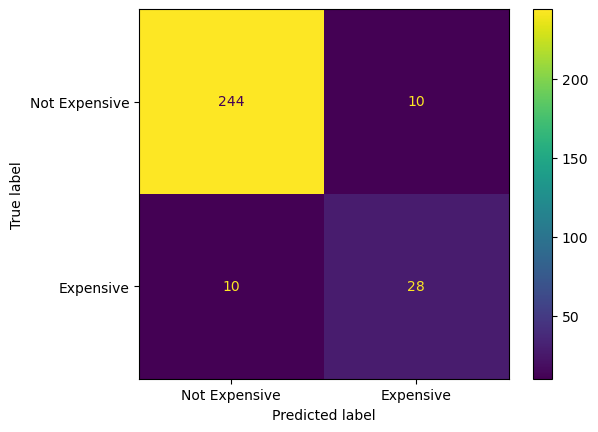

In [214]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive','Expensive']);

### KNN

Read the Platform lesson on KNN: https://learn.wbscodingschool.com/topic/%f0%9f%93%9d-iteration-5-k-nearest-neighbors/

> **Tip**: Check the SciKit-Learn docummentation to find how to import the KNN model for this task and how to tune its hyperparameters (the names and possible values of the parameters).


In [215]:
import warnings


# Filter out the specific warning by specifying its category
warnings.filterwarnings("ignore", category=UserWarning, message="Scoring failed.")
warnings.filterwarnings("ignore", category=UserWarning, message="One or more of the test scores are non-finite")


from sklearn.neighbors import KNeighborsClassifier
full_knn_pipeline = make_pipeline(preprocessor,
                              KNeighborsClassifier())

In [216]:
full_knn_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A'...
                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                  sparse_output=False),
                                                                                                    ['Heating',
                                                                                                     'MSZoning',
                                                                                                     'Condition1'])]))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [217]:
param_grid_knn = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50, 5),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

search_knn = GridSearchCV(full_knn_pipeline,
                      param_grid_knn,
                      cv=5,
                      verbose=1)

search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Si...
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'kneighborsclassifier__n_neighbors': range(2, 50, 5),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=1)

In [218]:
search_knn.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 17,
 'kneighborsclassifier__weights': 'distance'}

In [219]:
scores["knn"] = search_knn.best_score_

scores

{'dtree': 0.921246469315139, 'knn': 0.8707200762994753}

### Adding a scaler

In [220]:
from sklearn.preprocessing import StandardScaler
knn_full_pipeline_scaled = make_pipeline(preprocessor,
                                  StandardScaler(),
                                  KNeighborsClassifier()
                                 )

In [221]:
knn_full_pipeline_scaled

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A'...
                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                  sparse_output=False),
                                                                                                    ['Heating',
                                                                                                     'MSZoning',
                                                                                                     'Condition1'])]))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [222]:
param_grid_knn_scaled = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50, 5),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

search_knn_scaled = GridSearchCV(knn_full_pipeline_scaled,
                      param_grid_knn_scaled,
                      cv=5,
                      verbose=1)

In [223]:
search_knn_scaled.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Si...
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'kneighborsclassifier__n_neighbors': range(2, 50, 5),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=1)

In [224]:
search_knn_scaled.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'median',
 'kneighborsclassifier__n_neighbors': 17,
 'kneighborsclassifier__weights': 'distance'}

In [225]:
scores["knn_scaled"] = search_knn_scaled.best_score_

scores

{'dtree': 0.921246469315139,
 'knn': 0.8707200762994753,
 'knn_scaled': 0.9280950808847805}

In [226]:
accuracy_score(y_test, search_knn_scaled.predict(X_test))

0.9383561643835616

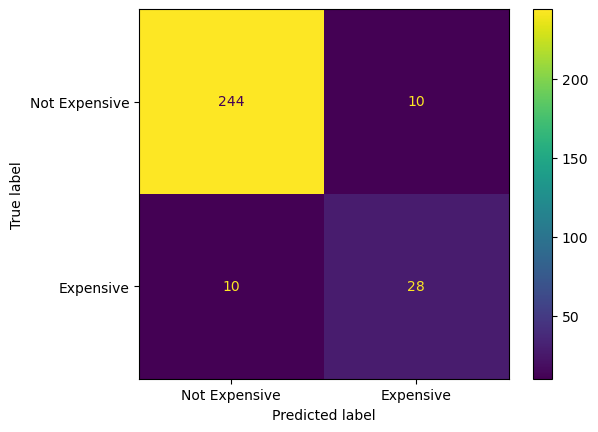

In [227]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive','Expensive']);

### **Exercise 2:** build the same pipeline using other algorithms

Go through the Plaform lesson on Model Selection () and check the performance of, at least, the following algorithms:

* Logistic Regression
* Support Vector Machine
* Random Forest

#### LogisticRegression

In [228]:
from sklearn.linear_model import LogisticRegression


In [229]:
full_logreg_pipeline_scaled = make_pipeline(preprocessor,
                                    StandardScaler(),
                                 LogisticRegression())

In [230]:
#full_logreg_pipeline_scaled = make_pipeline(preprocessor,
#                                  StandardScaler(),
#                                  LogisticRegression(solver='newton-cholesky'))

In [231]:
#full_logreg_pipeline_scaled = make_pipeline(preprocessor,
#                                  StandardScaler(),
#                                  LogisticRegression(solver='newton-cholesky'))

In [232]:
full_logreg_pipeline_scaled

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A'...
                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                  sparse_output=False),
                                                                                                    ['Heating',
                                                                                                     'MSZoning',
                                                                                                     'Condition1'])]))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [233]:
import numpy as np
import warnings

warnings.filterwarnings("ignore")
# Filter out the specific warning by specifying its category
#warnings.filterwarnings("ignore", category=UserWarning, message="Scoring failed.")
#warnings.filterwarnings("ignore", category=UserWarning, message="One or more of the test scores are non-finite")



param_grid_logreg = {
    'columntransformer__num_pipe__simpleimputer__strategy':['mean'],
    #'logisticregression__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__penalty' : ['l2'],
    #'logisticregression__C' : np.logspace(-4, 4, 20),
    #'logisticregression__solver' : ['newton-cholesky','newton-cg','liblinear','sag','saga'],
    'logisticregression__solver' : ['newton-cholesky'],
    #'logisticregression__max_iter' : [100, 1000,2500, 5000]
}

search_logreg = GridSearchCV(full_logreg_pipeline_scaled,
                      param_grid_logreg,
                      cv=10,
                      verbose=True)

search_logreg.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          S...
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean'],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['newton-cholesky']},
             verbose=True)

In [234]:
search_logreg.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cholesky'}

In [235]:
scores["logreg"] = search_logreg.best_score_

scores

{'dtree': 0.921246469315139,
 'knn': 0.8707200762994753,
 'knn_scaled': 0.9280950808847805,
 'logreg': 0.935823754789272}

In [236]:
#logreg': 0.935798393309123

In [237]:
accuracy_score(y_test, search_logreg.predict(X_test))

0.934931506849315

In [238]:
#0.934931506849315

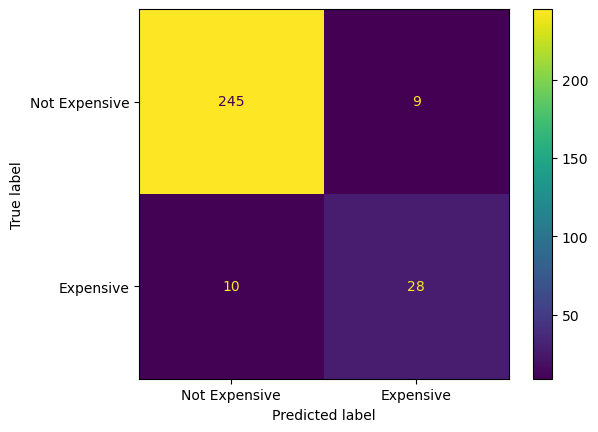

In [239]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_logreg,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive','Expensive']);

#### Support Vector Machines (SVC)

In [240]:
from sklearn.svm import SVC

In [241]:
full_svc_pipeline_scaled = make_pipeline(preprocessor,
                                    StandardScaler(),
                                 SVC())

In [242]:
full_svc_pipeline_scaled

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A'...
                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                  sparse_output=False),
                                                                                                    ['Heating',
                                                                                                     'MSZoning',
                                                                                                     'Condition1'])]))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()), ('svc', SVC())])

In [243]:
import numpy as np
import warnings

warnings.filterwarnings("ignore")

param_grid_svc = {
    'columntransformer__num_pipe__simpleimputer__strategy':['mean', 'median'],
    'svc__kernel':['linear','poly','rbf','sigmoid','precomputed']
}

search_svc = GridSearchCV(full_svc_pipeline_scaled,
                      param_grid_svc,
                      cv=10,
                      verbose=1)

search_svc.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          S...
                                                                         Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             verbose=1)

In [244]:
search_svc.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'svc__kernel': 'sigmoid'}

In [245]:
scores["svc"] = search_svc.best_score_

scores

{'dtree': 0.921246469315139,
 'knn': 0.8707200762994753,
 'knn_scaled': 0.9280950808847805,
 'logreg': 0.935823754789272,
 'svc': 0.9383731211317418}

In [246]:
accuracy_score(y_test, search_svc.predict(X_test))

0.9315068493150684

#### Random Forest Classifier

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
full_random_forest_pipeline_scaled = make_pipeline(preprocessor,
                                    StandardScaler(),
                                 RandomForestClassifier())

In [249]:
full_random_forest_pipeline_scaled

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A'...
                                                                                                                  sparse_output=False),
                                                                                                    ['Heating',
                                                                                                     'MSZoning',
                                                                                                     'Condition1'])]))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [251]:
param_grid_random_forest = {
       "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
       "randomforestclassifier__max_depth": range(2, 14, 2),
       "randomforestclassifier__min_samples_leaf": range(3, 12, 2),
       "randomforestclassifier__min_samples_split": range(3, 40, 5),
       "randomforestclassifier__criterion":["gini", "entropy"]
}

search_random_forest = GridSearchCV(full_random_forest_pipeline_scaled,
                      param_grid_random_forest,
                      cv=10,
                      verbose=1)

search_random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          S...
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': range(2, 14, 2),
                         'randomforestclassifier__min_samples_leaf': range(3, 12, 2),
                         'randomforestclassifier__min_samples_split': range(3, 40, 5)},
             verbose=1)

In [252]:
search_random_forest.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'median',
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 3}

In [253]:
scores["random_forest"] = search_random_forest.best_score_

scores

{'dtree': 0.921246469315139,
 'knn': 0.8707200762994753,
 'knn_scaled': 0.9280950808847805,
 'logreg': 0.935823754789272,
 'svc': 0.9383731211317418,
 'random_forest': 0.9426466254052462}

In [254]:
accuracy_score(y_test, search_random_forest.predict(X_test))

0.934931506849315